# Análise de Sistemas em Tempo Contínuo no Domínio do Tempo

## Introdução

Como no  exemplo do circuito $RC$ visto no último notebook, sistemas lineares são descritos por equações diferenciais lineares.  como exemplo, vamos analisar o circuito $RLC$ série descrito no *script* abaixo:




In [1]:
from lcapy import Circuit


In [2]:
cct = Circuit("""
Vi 1 0_1 step; down
L 1 2; right
R 2 3; right
C 3 0; down
W 0_1 0; right
;draw_nodes=none, label_nodes=none""")

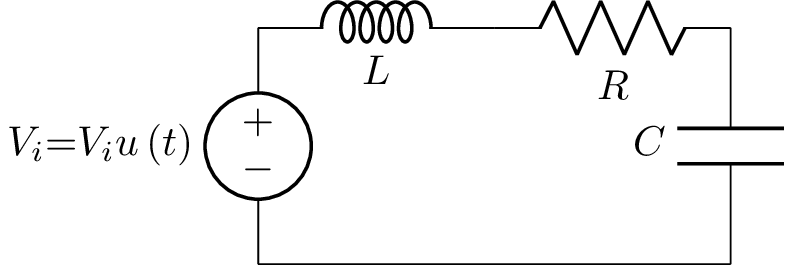

In [3]:
cct.draw()

In [4]:
l=cct.mesh_analysis()
l.mesh_equations()

⎧                                          t               ⎫
⎪                                          ⌠               ⎪
⎪                                          ⎮  -i₁(τ) dτ    ⎪
⎨                                          ⌡               ⎬
⎪         d                                -∞              ⎪
⎪i₁(t): L⋅──(-i₁(t)) - R⋅i₁(t) + Vᵢ⋅u(t) + ──────────── = 0⎪
⎩         dt                                    C          ⎭

Fazendo  uso do operador diferencial *D* uma segunda vez, isto é, transformando a equação integro-diferencial acima em uma equação diferencial de segunda ordem:

$$ LDi_1(t)+Ri_1(t)+\frac{i_1(t)}{DC}=v_iu(t) $$
$$ LD^2i_1(t)+RDi_1(t)+\frac{i_1(t)}{C}=DV_iu(t) $$

Inserindo os valores *L=1*, *R=3* e *C=1/2* resulta na seguinte equação com coeficientes constantes:

\begin{equation*}(D^2+3D+2)i_1(t)=DV_iu(t)\label{}\tag{1}\end{equation*}

a qual é uma equação diferencial linear de segunda ordem. Em um sistema arbitrário, poderíamos ter *N* derivadas temporais sobre a saída *y(t)* e *M* derivadas sobre a entrada *x(t)*, de forma que o sistema seria representado pela equação seguinte:

$$ (D^N+a_1D^{N-1}+a_2D^{N-2}+...+a_N)y(t)=(b_0D^M+b_1D^{M-1}+...+b_M)x(t) $$


Esta última equação pode ser escrita mais abstratamente como:
$$ Q(D)y(t)=P(D)x(t) $$

onde

$Q(D)=D^N+a_1D^{N-1}+a_2D^{N-2}+...+a_N$ e

$P(D)=b_0D^M+b_1D^{M-1}+...+b_M$.

*N* e *M* podem assumir quaisquer valores em princípio, mas na prática teremos quase sempre *N > M*. Para entender o motivo, considere novamente a equação do circuito *RLC*, onde *N=2* e *M=1*. Integrando duas vezes, veremos que a saída será função da integral da entrada, isto é, o sistema funciona como um integrador. Caso *N = M*, a saída será função da entrada. Mas se *N < M*, então a saída será funcão da derivada temporal da entrada, o que, como será visto, configura um sistema instável além de amplificar consideravelmente componentes de alta frequência normalmente contendo ruído. Portanto, neste texto será geralmente considerado que $N \ge M$.

Além da entrada, a saida *y(t)* pode ser determinada a partir das condições iniciais do problema. Como é um sistema linear, a saída  pode ser decomposta em duas partes, sendo a primeira considerando *x(t)=0* e resolvendo apenas para suas condições iniciais (resposta de entrada nula), isto é,
$$ Q(D)y_0(t)=0 $$

e contrariamente, desconsiderando as condições iniciais (resposta de estado nulo) e resolvendo para a entrada

$$ Q(D)y(t)=P(D)x(t). $$

Pela aditividade teremos $y_t(t)=y_0(t)+y(t)$.




## Resposta à Entrada Nula

Neste caso, a resposta deve-se unicamente as condicões iniciais do problema, ou seja, precisamos resolver

\begin{equation*}(D^N+a_1D^{N-1}+a_2D^{N-2}+...+a_N)y_0(t)=0\label{}\tag{2}\end{equation*}

sujeito às condições iniciais.  Para que esta equação seja satisfeita para todo *t*, $y_0(t)$ e suas derivadas precisam ter a mesma forma, e a única função que possui esta propriedade é a função exponencial. Portanto, 
$$ y_0(t)=ce^{\lambda t}, $$

 de forma que
 $$ Dy_0(t)=c\lambda e^{\lambda t} $$
 $$ D^Ny_0(t)=c\lambda^Ne^{\lambda t} $$
 
 e daí $(D^N-\lambda^N)ce^{\lambda t}=0$ é um problema de **autovalores**. A equação (2) pode agora ser escrita como

$$ (\lambda^N +a_1\lambda^{N-1}+a_2\lambda^{N-2}+....a_N)ce^{\lambda t}=0 $$
 
 onde $Q(\lambda)=\lambda^N +a_1\lambda^{N-1}+a_2\lambda^{N-2}+....a_N$ é o polinômio característico do sistema e 
 
 $$ Q(\lambda)=0 $$
 
 é a equação característica. O polinômio característico pode ser fatorado e ecrito como 
 
 $$ Q(\lambda)=(\lambda-\lambda_1)(\lambda-\lambda_2)...(\lambda-\lambda_N) $$
 
 e os vários $\lambda_i$ são as raízes (autovalores) do sistema.
 
 **Exemplo** Considere o circuito descrito acima com a equação diferencial (1). Para determinar a resposta de entrada nula escrevemos
 
 $$ (D^2+3D+2)y_0(t)=0 $$
 
 onde $y_0(t)$ foi escrito como reposta representando a corrente. $Q(\lambda)=\lambda^2+3\lambda+2$ e a equação característica é
 
 $$ \lambda^2+3\lambda+2=0 $$
 
 de onde obtemos $\lambda_1=-1$ e $\lambda_2=-2$, os autovalores do sistema. 
 
 
 Com as raízes ou autovalores podemos encontrar a resposta de entrada nula.  Para cada raíz teremos um termo exponencial $e^{\lambda_it}$, denominados de modos característicos do sistema, por determinarem a forma como a resposta evolui naturalmente com o tempo. A somatória dos modos característicos resultará na resposta de entrada nula. Além disso, a forma final dos modos característicos dependerá dos autovalores da equação característica.

### Raízes (autovalores) Distintas

$\lambda_i \ne \lambda_j \; \forall i,j$. Então os modos característicos do sistema serão $c_1e^{\lambda_1 t},\;c_2e^{\lambda_2 t},...,\;c_Ne^{\lambda_N t}$, ou seja, cada um destes termos satisfaz a equação característica. A resposta à entrada nula será dada por (por superposição dos modos característicos):

$$ y_0(t)= \sum_{i=1}^{N}c_i e^{\lambda_i t}. $$

Os coeficientes $c_i$ são encontrados através das condições iniciais do problema. 










**Exemplo** Vamos usar um *script Python* para descrever e analisar a resposta de entrada nula do circuito $RLC$ série mostrado no início deste notebook. As condições iniciais sobre o circuito são $I(0)=0$ e $Vc(0)=5V$. Estas condições iniciais são  adicionadas na *netlist* descritora do circuito. Além disso, a corrente de entrada nula é a corrente resultante quando os terminais da fornte estão curto-circuitados, como mostrado na *netlist* e figura a seguir.

In [5]:
from lcapy import *
cct=Circuit("""
W 0_1 0;down
L 0_1 0_2 1 0;right,size=1.5,i=i_0
C 0_2 1 0.5  5;right, v=v_0
R 1 0_4 3;down,size=1.5
W 0_4,0;left
;draw_nodes=none,label_nodes=none""")



Na *netlist* acima, a linha "C 0_2 1 0.5  5;right, v=v_0" descreve o capacitor com capacitância $C=0.5\,F$ e tensão inicial de 5 V, e a linha "L 0_1 0_2 1 0;right,size=1.5,,i=i_0" descreve o indutor com indutância $L=1\,H$ e corrente inicial nula. Agora o circuito pode ser mostrado com o comando

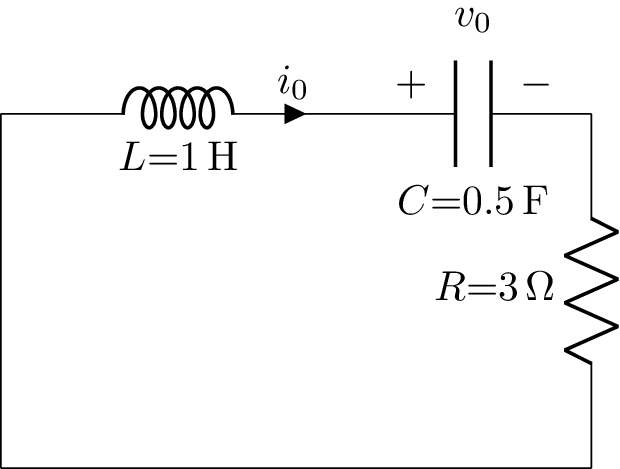

In [6]:
cct.draw()

A seguir obtemos a corrente transitória de entrada nula:

In [7]:
cct.R.i

     -t      -2⋅t           
- 5⋅ℯ   + 5⋅ℯ      for t ≥ 0

usamos linspace para escrever um vetor de 1000 amostras de tempo, e matplotib para fazer o gráfico da corrente de entrada nula. 

In [8]:
from numpy import linspace
t = linspace(0, 10, 1000)
ien=cct.R.i.evaluate(t)


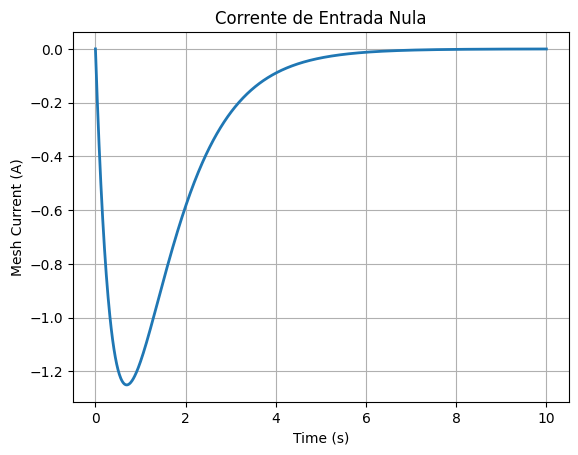

In [9]:
from matplotlib.pyplot import figure

fig = figure()
ax = fig.add_subplot(111, title='Corrente de Entrada Nula')

ax.plot(t, ien, linewidth=2)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Mesh Current (A)')
ax.grid();

Para resolver o mesmo problema analiticamente, lembramos que  resposta de entrada nula é $y(t)=I(t)$, e da condição inicial imposta sobre a corrente temos $y(0)=0$. Por outro lado, podemos reescrever a equação (com a fonte curto-circuitada) do sistema como 

$$ y_0(t)'+3y_0(t)+v_c(t)=0 $$

Dessa equação decorre que em $t=0$  $y(0)'=-V_c(0)=-5$. Portanto, as condições iniciais são $y_0(0)=0$ e $y_0(0)' =-5$. Também vimos anteriormente que os autovalores para esta sistema são  $\lambda_1=-1$ e $\lambda_2=-2$. Portanto, a resposta de entrada nula é dada por

$$ y_0(t)=c_1e^{-t}+c_2e^{-2t}. $$

substituindo as condições iniciais, $y_0(0)=0=c_1+c_2\rightarrow c_1=-c_2$, e $y_0'(0)=-5=-c_1-2c_2$ e portanto $c_1=-5$ e $c_2=5$, e a resposta de entrada nula é

$$ y_0(t)=5(-e^{-t}+e^{-2t})\quad\forall t\ge0. $$

### Raízes Repetidas

Inicialmente vamos analisar a resposta de entrada nula descrita na equação (2) com *N=2*, ou $(D^2+a_1D+a_2)y_0(t)=0.$ Vamos supor que as duas raízes são idênticas. Isso significa que 
$$ \lambda=\frac{-a_1 \pm \sqrt{a_1^2-4a_2}}{2}=\frac{-a_1}{2},$$
pois
$$ \sqrt{a_1^2-4a_2}=0 $$

 e assim $a_1=-2\lambda$ e $a_2=\frac{a_1^2}{4}=\lambda^2$. Portanto, a equação diferencial pode ser reescrita como:
$$ (D^2 - 2\lambda D +\lambda^2)y_0(t)=0 $$
ou ainda, 
\begin{equation*}(D-\lambda)^2y_0(t)=0\label{}\tag{3}\end{equation*}

com soluções $ce^{\lambda t}$ e $cte^{\lambda t}$, o que pode ser facilmente comprovado por simples substituição em (3).

**Exemplo** $Q(\lambda)=\lambda^2+6\lambda+9$, e as condições iniciais são $y_0(0)=3$ e $y_0'(0)=-7$. Os autovalores da equação característica são $\lambda_1=\lambda_2=-3$ e portanto,

$$ y_0(t)=c_1e^{-3t}+c_2te^{-3t} $$

Sumstituindo as condições de iniciais,

$$ y_0(0)=3=c_1+c_2  \times 0 \rightarrow c_1=3, $$

$$ y_0'(0)=-7 =-3c_1+c_2 \rightarrow c_2=2, $$

e portanto

$$ y_0(t)=(3e^{-3t}+2te^{-3t} )u(t). $$

### Raízes Complexas

Se os coeficientes do polinômio característico são reais, algumas raízes podem ser complexas, e aparecerão em pares conjugados. Para um polinômio de segunda ordem, as raízes podem ser um par conjugado $\alpha \pm j \beta$,  um polinômio de terceira ordem pode resultar em uma raíz real e um par conjugado, e assim por diante. O número de raízes é igual à ordem *N* do polinômio.

Considere que as raízes $\lambda_1$ e $\lambda_2$ formam um par complexo conjugado, ou seja:

$$ \lambda_1=\alpha + j\beta,\quad, \lambda_2= \lambda_1^*=\alpha -j \beta. $$

e portanto,

\begin{equation*}y_0(t)=c_1e^{(\alpha + j\beta)t}+c_2e^{(\alpha - j\beta)t}\label{} \tag{4}\end{equation*}

A resposta de entrada nula $y_0(t)$ deve ser real e portanto $c_1$ e $c_2$ devem formar um par conjugado, $c_1=c_2^*$.  Vamos assumir 

$$ c_1=\frac{c_0}{2}e^{j\varphi}\quad \mbox{e}\quad c_2=\frac{c_0}{2}e^{-j\varphi}. $$


Substituindo essas constantes complexas em (4) resulta em 

$$ y_0(t)=\frac{c_0}{2}e^{j\varphi}e^{\alpha t}e^{j\beta t}+\frac{c_0}{2}e^{-j\varphi}e^{\alpha t}e^{-j\beta t} $$

ou

$$ y_0(t)=\frac{c_0}{2}e^{\alpha t}\left[ e^{j(\beta t +\varphi)}+e^{-j(\beta t+\varphi)}\right] $$

O termo entre colchetes é $2\cos(\beta t +\varphi)$ (fórmula de Euler), e finalmente

\begin{equation*}y_0(t)=c_0e^{\alpha t}\cos(\beta t+ \varphi).\label{} \tag{5}\end{equation*}

**Exemplo** Seja o sistema linear representado pela equação diferencial

$$ y"(t)+4y'(t)+40y(t)=x'(t)+2x(t) $$

e condições inciais $y_0(0)=2$ e $y'_0(0)=16,78$.

Usando o operador *D* , a equação para determinação da resposta de entrada nula é

$$ (D^2+4D+40)y_0(t)=0. $$

O polinômio característico é $\lambda^2+4\lambda+40$ e as raízes formam um par complexo conjugado

$$ \lambda_1=-2+j6\quad \mbox{e}\quad \lambda_2=-2-j6 $$

que, inseridos em (5) resulta em:

$$ y_0(t)=c_0e^{-2 t}\cos(6 t+ \varphi). $$

Esta equação tem como antes duas constantes $c_0$ e $\varphi$ que serão determinadas com o auxílio das condições iniciais. 

$$ y_0(0)=2=c_0\cos(\varphi)\quad \mbox{e}\quad y'_0(0)=16,78=-2c_0\cos(\varphi)-6c_0\sin(\varphi). $$

destas duas equações determinamos que $c_0\cos(\varphi)=2$ e $c_0\sin(\varphi)=-3,46$. Elevando cada termo ao quadrado e somando encontramos $c_0\approx 4$, e ainda, dividindo o segundo pelo primeiro resulta em $\tan(\varphi)=\frac{-3,46}{2}\rightarrow \varphi= -\frac{\pi}{3}.$ Daí, a resposta de entrada nula é

$$ y_0(t)=4e^{-2t}\cos(6t-\frac{\pi}{3}) $$

cujo gráfico é obtido com o *script* Python mostrado abaixo. A curva laranja é a resposta de entrada nula, enquanto a curva azul é a sua envoltória exponencial.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

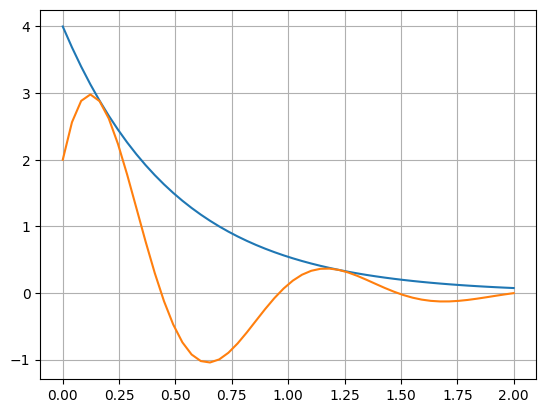

In [11]:
t=np.linspace(0,2,50)
ye=4.*np.exp(-2*t)
y=4.*np.exp (-2.*t)*np.cos(6.*t-np.pi/3)
plt.plot(t,ye,t,y);
plt.grid()

Adequando as condições iniciais à tensão inicial no capacitor e corrente inicial no indutor, podemos refazer o problema com o *script* abaixo:

In [12]:
from lcapy import Vstep, R, L, C, t
b = R(4) + C(0.025,24.78) + L(1, -2)


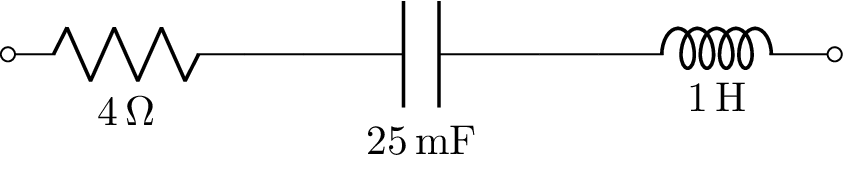

In [13]:
b.draw()

In [14]:
b.Isc(t)

⎛1039⋅sin(6⋅t)             ⎞  -2⋅t           
⎜───────────── + 2⋅cos(6⋅t)⎟⋅ℯ      for t ≥ 0
⎝     300                  ⎠                 

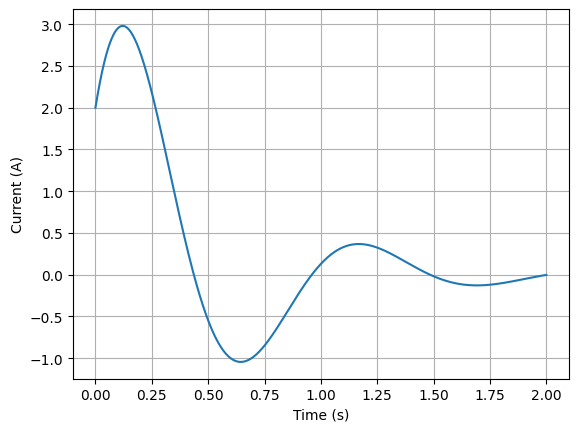

In [15]:
vt = linspace(0, 2, 1000)

b.Isc.transient_response().plot(vt);

 A mesma curva é obtida. Para confirmar que a solução é a mesma, basta verificar que $4\cos(6t-\frac{\pi}{3})=4\cos(\frac{\pi}{3})\cos(6t)+4\sin(\frac{\pi}{3})\sin(6t)\approx 3.46\sin(6t)+2\cos(6t)$, que é a resposta dada pelo pacote Lcapy.